<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/Pr2_ProcesamientoVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python
!pip install opencv_jupyter_ui
!pip install -q ipycanvas==0.11
from google.colab import output
output.enable_custom_widget_manager()
!pip install easyocr

In [3]:
import cv2
from matplotlib import pyplot as plt
import opencv_jupyter_ui as jcv2

In [4]:
from google.colab import files
uploadfile=files.upload()

Saving Mall_Security_Cam.mp4 to Mall_Security_Cam (2).mp4


In [ ]:
a = cv2.VideoCapture("Mall_Security_Cam.mp4")
Backremover = cv2.createBackgroundSubtractorMOG2 #que me quita el fondo, y se ejecuta en la stack de servicio junto a la CPU
#si quiero aplicarlo a una foto, linea ****
while(a.isOpened):
# ahora tengo que ver la imagen que me interesa
  ret, frame = a.read() #me da primero un vlaor de retornno, si ha podido conseguir la imagen, y después la imagen
  # si el fichero se corrompe y el string se pierde, me marca como false, eso es que entonces que no lo procesa, para evitar que pete
  #puedo poner _ para que no me lo guarde, pero lo que no puedo hacer es no leerlo

  people = Backremover.apply(frame); #****
  # regionOfinterest = frame(600:640, 320:400)#no cojas toda la imagen, sólo esas filas y columnas
  #con esto la ventaja es que optimizamos tiempo, ya que perdemos mucho ruido

  clusters, _= cv2.findContours(people, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )# para encontrar contornos, y que si hay pixeles muy juntos, pero que no estén pegados, pues que no me lo considere como un elemento suelto si no como parte del cluster inciial
  # lo que tengo es una lista de todos los clusters tanto grandes como pequeños, por lo que al ser una lista, puedo iterar sobre ellos
  for cnt in clusters:
    area = cv2.contourArea(cnt)
    if area < 20:
    #no voy a hacer nada porque si hago algo luego no puedo visualizarlo, por lo que los clusters los voy a pintar sobre la imagen original
      cv2.drawContours(frame, [cnt], -1, (0,255,0),2)
      #pinto sobre donde está mi objeto y el -1 es para escalar, que no escale nada, y lo siguiente es el color / el 2 es el espesosr de la linea
      #pero ahora esto no hace nada, hay que darle una etiqueta
      x,y,w,h = cv2.boundingRect(cnt) #en cada centroide me dibuja una caja y me devuelve las coordenadas del centroide y la caja de alrededor para poder identificar si es el mismo objeto entre frames
      #aqui tengo el número de coches por frames, pero no sé si es el mismo de antes
      #en cada frames tengo objetos distintos, en cada frame cojo toda lal lista de mancha de pixeles y lo mando a esta función

  jcv2.imshow("video",frame); # esto me enseña el vídeo

  #el problema que tengo ahora es que la libreria funciona mal y si le pasas una foto que has procesado rompe
  if cv2.waitKey(1) == ord('q'):
    break
  a.release()
  jcv2.destroyAllWindows()

  # #si ahora quiero ver coches
  # plt.imshow(coches)
  # plt.show()

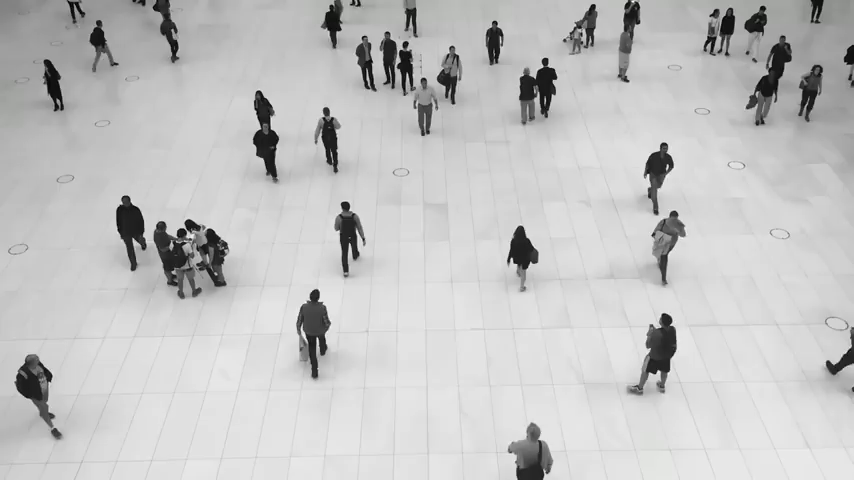

AttributeError: ignored

In [10]:
from google.colab.patches import cv2_imshow
# Video
cap = cv2.VideoCapture("Mall_Security_Cam.mp4")

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")

while True:
  ret, frame = cap.read()

  cv2_imshow(frame)

  key = cv2.waitKey(14)
  if key == 13:
    break

  cap.release()
  cv2.destroyAllWindows()



#   gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
#   blur = cv2.GaussianBlur(gray, (5,5), 0)
#   _, mask = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
#   dil = cv2.dilate(mask, None, iterations=5)
#   cont, _ = cv2.findContours(dil, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#   cv2.drawContours(frame1, cont, -1, (0, 255, 0), 2)

#   jcv2.imshow('feed', frame1)
#   frame1 = frame2
#   ret, frame2 = cap.read()

#   if cv2.waitKey(3) == 5:
#     break

# cv2.destroyAllWindows()
# cap.release()

In [ ]:
from google.colab.patches import cv2_imshow
# Video
cap = cv2.VideoCapture("Mall_Security_Cam.mp4")

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")


ret, frame1 = cap.read(1)
ret, frame2 = cap.read(2)

while(cap.isOpened()):
  diff = cv2.absdiff(frame1,frame2)
  gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  _, mask = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
  dil = cv2.dilate(mask, None, iterations=5)
  cont, _ = cv2.findContours(dil, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  cv2.drawContours(frame1, cont, -1, (0, 255, 0), 2)

  jcv2.imshow('feed', frame1)
  frame1 = frame2
  ret, frame2 = cap.read()

  if cv2.waitKey(3) == 5:
    break

cv2.destroyAllWindows()
cap.release()

error: ignored